1D plotting utilities
===============

**Suhas Somnath**

8/12/2017

### Table of contents:
* [use_scientific_ticks](#use_scientific_ticks)
* [plot_curves](#plot_curves)
* [plot_line_family](#plot_line_family)
* [plot_complex_spectra](#plot_complex_spectra)
* [rainbow_plot](#rainbow_plot)
* [plot_scree](#plot_scree)

#### Import necessary packages:

In [1]:
from __future__ import division, print_function, absolute_import, unicode_literals
import numpy as np
from warnings import warn
import matplotlib.pyplot as plt
import subprocess
import sys


def install(package):
    subprocess.call([sys.executable, "-m", "pip", "install", package])
# Package for downloading online files:
try:
    import sidpy
except ImportError:
    warn('sidpy not found.  Will install with pip.')
    import pip
    install('sidpy')
    import sidpy

use_scientific_ticks() <a class="anchor" id="use_scientific_ticks"></a>
------------------------
Often scientific plots look ugly because of the way tick marks are formatted for small or large values.
use_scientific_ticks() is a handy function that can convert tick marks on 1D plots to scientific form

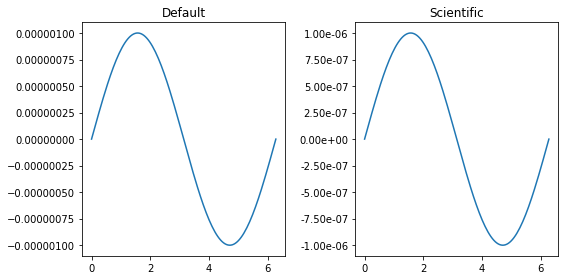

In [2]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
x_vec = np.linspace(0, 2*np.pi, 128)
for axis, title in zip(axes.flat, ['Default', 'Scientific']):
    axis.plot(x_vec, np.sin(x_vec) * 1E-6)
    axis.set_title(title)
    
# Changing how the tick marks on the Y axis are formatted only on the second axis:
sidpy.viz.plot_utils.use_scientific_ticks(axes[1], is_x=False)

fig.tight_layout()

plot_curves()  <a class="anchor" id="plot_curves"></a>
---------------
This function is particularly useful when we need to plot a 1D signal acquired at multiple locations.
The function is rather flexible and can take on several optional arguments that will be alluded to below
In the below example, we are simply simulating sine waveforms for different frequencies (think of these as
different locations on a sample)

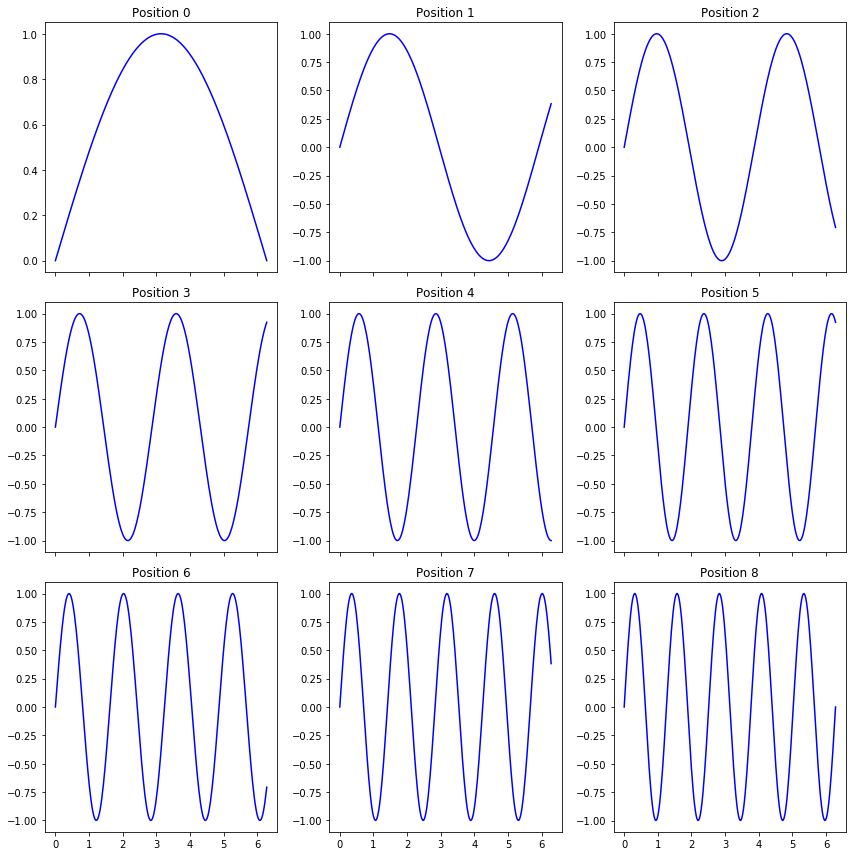

In [3]:
x_vec = np.linspace(0, 2*np.pi, 256)
# The different frequencies:
freqs = np.linspace(0.5, 5, 9)
# Generating the signals at the different "positions"
y_mat = np.array([np.sin(freq * x_vec) for freq in freqs])

sidpy.viz.plot_utils.plot_curves(x_vec, y_mat);

Frequently, we may need to compare signals from two different datasets for the same positions
The same plot_curves function can be used for this purpose even if the signal lengths / resolutions are different

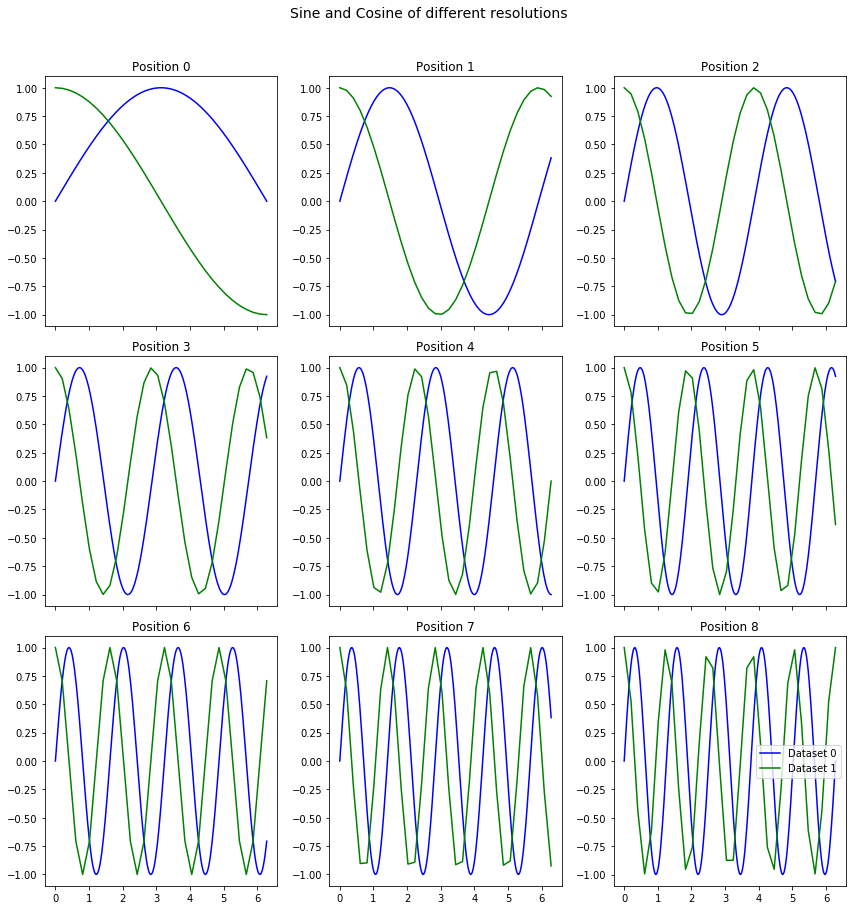

In [4]:
x_vec_1 = np.linspace(0, 2*np.pi, 256)
x_vec_2 = np.linspace(0, 2*np.pi, 32)
freqs = np.linspace(0.5, 5, 9)
y_mat_1 = np.array([np.sin(freq * x_vec_1) for freq in freqs])
y_mat_2 = np.array([np.cos(freq * x_vec_2) for freq in freqs])

sidpy.viz.plot_utils.plot_curves([x_vec_1, x_vec_2], [y_mat_1, y_mat_2],
                          title='Sine and Cosine of different resolutions');

plot_line_family()  <a class="anchor" id="plot_line_family"></a>
-------------------
Often there is a need to visualize multiple spectra or signals on the same plot. plot_line_family
is a handy function ideally suited for this purpose and it is highly configurable for different styles and purposes
A few example applications include visualizing X ray / IR spectra (with y offsets), centroids from clustering
algorithms

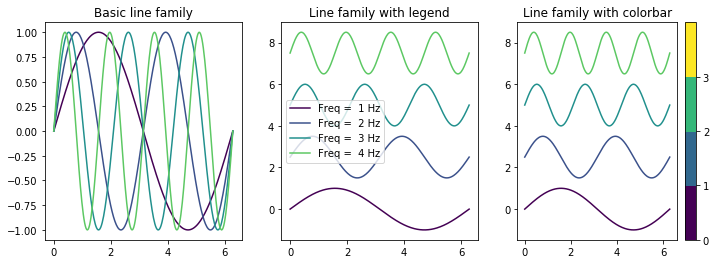

In [5]:
x_vec = np.linspace(0, 2*np.pi, 256)
freqs = range(1, 5)
y_mat = np.array([np.sin(freq * x_vec) for freq in freqs])
freq_strs = [str(_) for _ in freqs]

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
sidpy.viz.plot_utils.plot_line_family(axes[0], x_vec, y_mat)
axes[0].set_title('Basic line family')

# Option suitable for visualizing spectra with y offsets:
sidpy.viz.plot_utils.plot_line_family(axes[1], x_vec, y_mat, 
                               line_names=freq_strs, label_prefix='Freq = ', label_suffix='Hz',
                                 y_offset=2.5)
axes[1].legend()
axes[1].set_title('Line family with legend')

# Option highly suited for visualizing the centroids from a clustering algorithm:
sidpy.viz.plot_utils.plot_line_family(axes[2], x_vec, y_mat, 
                               line_names=freq_strs, label_prefix='Freq = ', label_suffix='Hz',
                                 y_offset=2.5, show_cbar=True)
axes[2].set_title('Line family with colorbar');

plot_complex_spectra()  <a class="anchor" id="plot_complex_spectra"></a>
-----------------------
This handy function plots the amplitude and phase components of multiple complex valued spectra
Here we simulate the signal coming from a simple harmonic oscillator (SHO). 

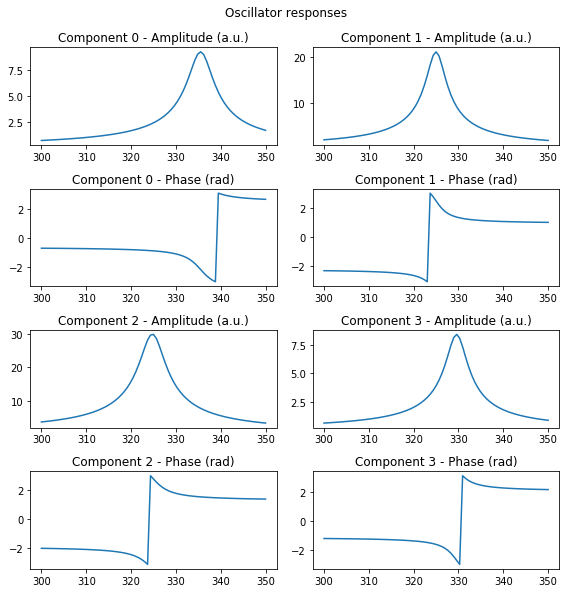

In [6]:
num_spectra = 4
spectra_length = 77
w_vec = np.linspace(300, 350, spectra_length)
amps = np.random.rand(num_spectra)
freqs = np.random.rand(num_spectra)*35 + 310
q_facs = np.random.rand(num_spectra)*25 + 50
phis = np.random.rand(num_spectra)*2*np.pi
spectra = np.zeros((num_spectra, spectra_length), dtype=complex)


def sho_resp(parms, w_vec):
    """
    Generates the SHO response over the given frequency band
    Parameters
    -----------
    parms : list or tuple
        SHO parae=(A,w0,Q,phi)
    w_vec : 1D numpy array
        Vector of frequency values
    """
    return parms[0] * np.exp(1j * parms[3]) * parms[1] ** 2 / \
        (w_vec ** 2 - 1j * w_vec * parms[1] / parms[2] - parms[1] ** 2)


for index, amp, freq, qfac, phase in zip(range(num_spectra), amps, freqs, q_facs, phis):
    spectra[index] = sho_resp((amp, freq, qfac, phase), w_vec)

fig, axis = sidpy.viz.plot_utils.plot_complex_spectra(spectra, w_vec, title='Oscillator responses')

rainbow_plot()  <a class="anchor" id="rainbow_plot"></a>
---------------
This function is ideally suited for visualizing a signal that varies as a function of time or when 
the directionality of the signal is important

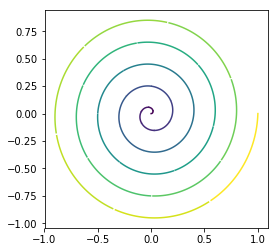

In [7]:
num_pts = 1024
t_vec = np.linspace(0, 10*np.pi, num_pts)

fig, axis = plt.subplots(figsize=(4, 4))
sidpy.viz.plot_utils.rainbow_plot(axis, np.cos(t_vec)*np.linspace(0, 1, num_pts),
                           np.sin(t_vec)*np.linspace(0, 1, num_pts),
                           num_steps=32)

plot_scree()  <a class="anchor" id="plot_scree"></a>
------------
One of the results of applying Singular Value Decomposition is the variance or statistical significance
of the resultant components. This data is best visualized via a log-log plot and plot_scree is available
exclusively to visualize this kind of data

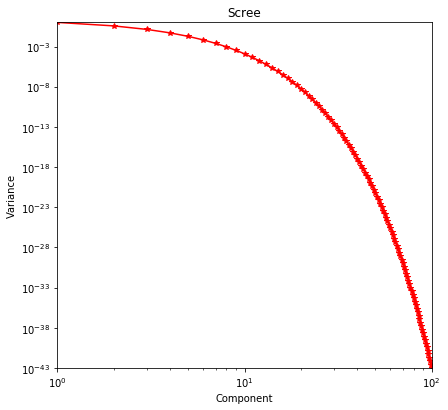

In [8]:
scree = np.exp(-1 * np.arange(100))
sidpy.viz.plot_utils.plot_scree(scree, color='r');